# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [1]:
!pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Download Cifar10 dataset

In [3]:
torch.cuda.is_available()

False

In [5]:
# DATA_PATH = '/home/pepe/Documents/github_repos/datasets/asl_data'
DATA_PATH = '/content/drive/MyDrive/Colab/Advanced Machine Learning Methods/sor/'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 5

# Transformaciones de datos
transform_train = T.Compose([
    T.RandomHorizontalFlip(),
    T.RandomCrop(32, padding=4),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_val = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Descargar el conjunto de datos CIFAR-10
cifar10_train = datasets.CIFAR10('data', train=True, download=True, transform=transform_train)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = datasets.CIFAR10('data', train=False, download=True, transform=transform_val)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_train)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))



100%|██████████| 170498071/170498071 [00:03<00:00, 42989603.09it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Files already downloaded and verified


In [6]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(32, 32), padding=4)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [7]:
train_loader.batch_size

64

In [8]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se truncaron las últimas líneas 5000 del resultado de transmisión.

         [[-2.4183e+00, -2.4183e+00, -2.4183e+00,  ..., -1.3169e+00,
           -1.7889e+00, -1.9069e+00],
          [-2.4183e+00, -2.4183e+00, -2.4183e+00,  ..., -1.2972e+00,
           -1.6119e+00, -1.9463e+00],
          [-2.4183e+00, -2.4183e+00, -2.4183e+00,  ..., -1.4546e+00,
           -1.7496e+00, -1.9266e+00],
          ...,
          [-2.4183e+00, -2.4183e+00, -2.4183e+00,  ...,  2.5644e-01,
            5.7111e-01, -8.2524e-01],
          [-2.4183e+00, -2.4183e+00, -2.4183e+00,  ...,  2.5644e-01,
            4.7277e-01, -9.2357e-01],
          [-2.4183e+00, -2.4183e+00, -2.4183e+00,  ..., -2.4183e+00,
           -2.4183e+00, -2.4183e+00]],

         [[-2.2214e+00, -2.2214e+00, -2.2214e+00,  ..., -1.1678e+00,
           -1.6166e+00, -1.7141e+00],
          [-2.2214e+00, -2.2214e+00, -2.2214e+00,  ..., -1.0898e+00,
           -1.3629e+00, -1.7531e+00],
          [-2.2214e+00, -2.2214e+00, -2.2214e+00,  ..., -1.

### Using  GPUs

In [9]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: automobile


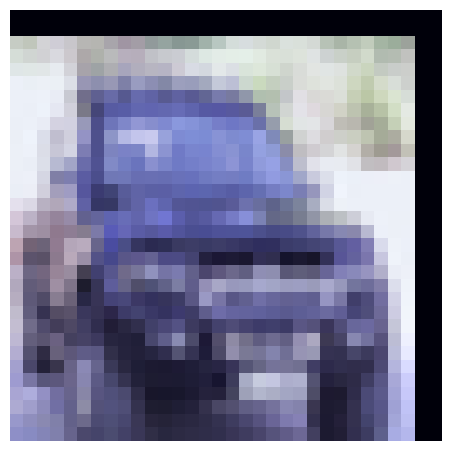

In [10]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


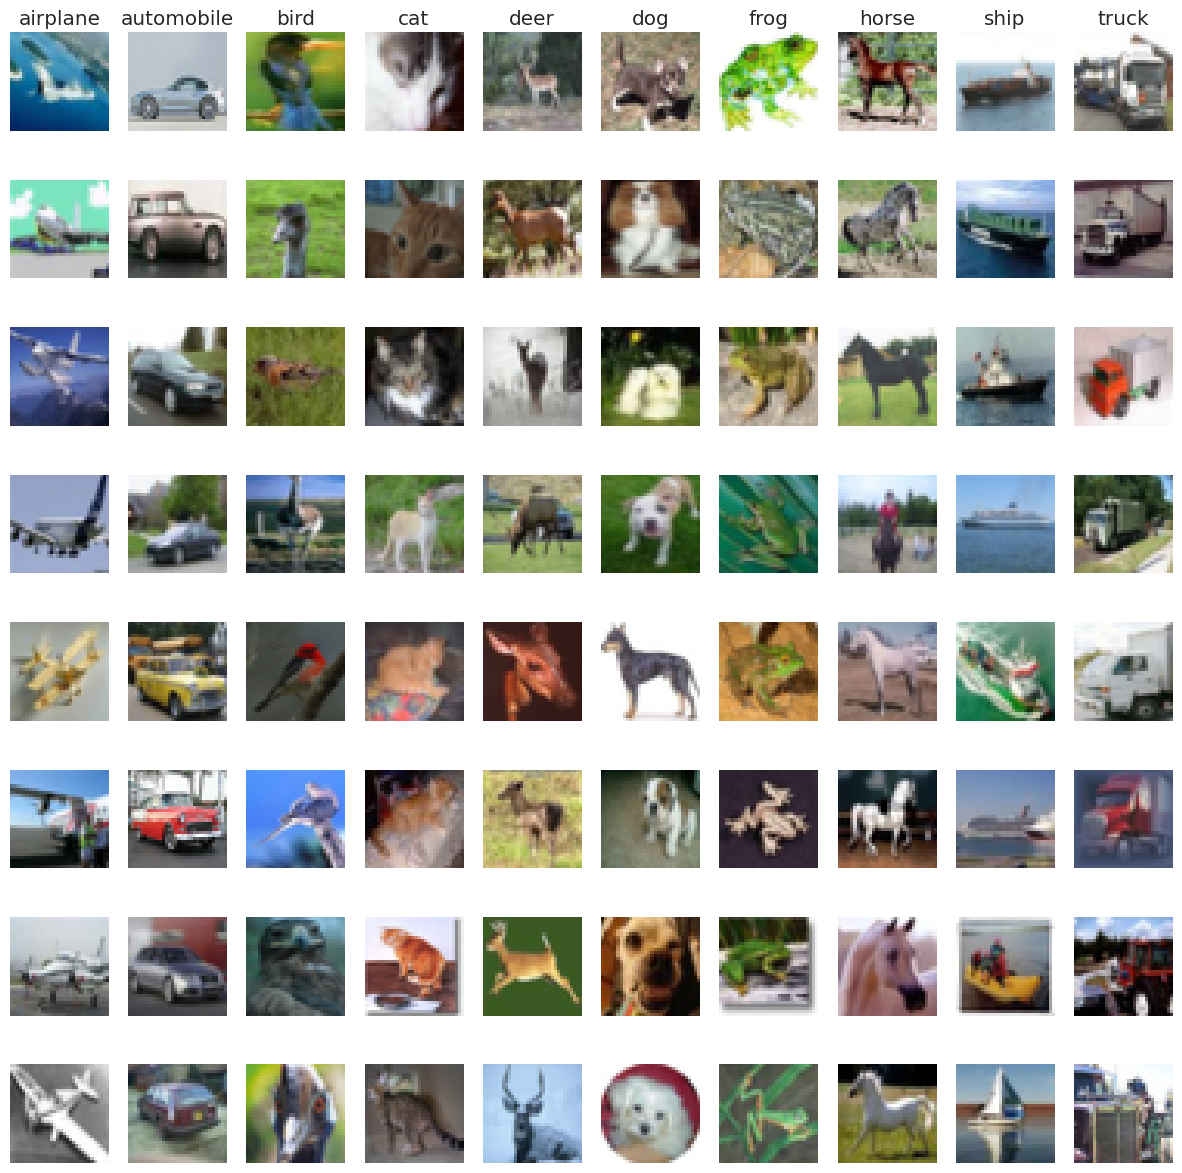

In [11]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [12]:
def accuracy(model, loader):
    model.eval()  # Poner el modelo en modo de evaluación
    correct = 0
    total = 0

    with torch.no_grad():  # Desactivar el cálculo de gradientes durante la evaluación
        for data in loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Mover datos a la GPU si está disponible

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


### Loop de entrenamiento

In [13]:
def train(model, optimizer, train_loader, val_loader, epochs=100):
    # Definir la función de pérdida (puedes cambiar esto según tu problema)
    criterion = nn.CrossEntropyLoss()

    model.to(device)  # Mover el modelo a la GPU si está disponible
    model.train()  # Poner el modelo en modo de entrenamiento

    for epoch in range(epochs):
        running_loss = 0.0  # Para llevar un seguimiento de la pérdida durante el entrenamiento

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Mover datos a la GPU

            # Reiniciar los gradientes
            optimizer.zero_grad()

            # Propagación hacia adelante
            outputs = model(inputs)

            # Calcular la pérdida
            loss = criterion(outputs, labels)

            # Retropropagación y optimización
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calcular la precisión en el conjunto de validación
        val_accuracy = accuracy(model, val_loader)

        # Imprimir estadísticas del entrenamiento
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    print('Entrenamiento completado')


### Linear model

In [14]:
# To do: Use PyTorch to create a linear model to have an initial baseline model

In [15]:
# Define una clase de modelo lineal simple
class LinearModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Aplana la entrada
        out = self.fc(x)
        return out

In [16]:
# Crea el modelo
input_size = 3 * 32 * 32  # Tamaño de la entrada (3 canales de 32x32 píxeles)
num_classes = 10  # Número de clases en CIFAR-10
model = LinearModel(input_size, num_classes)

# Optimizador y función de pérdida
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

# Entrenamiento usando la función train
train(model, optimizer, train_loader, val_loader, epochs=EPOCHS)

# Medir la precisión en el conjunto de validación
val_accuracy = accuracy(model, val_loader)
print(f'Precisión en el conjunto de validación Lineal: {val_accuracy:.2f}%')


Epoch 1, Loss: 2.0124, Validation Accuracy: 32.78%
Epoch 2, Loss: 1.9291, Validation Accuracy: 34.32%
Epoch 3, Loss: 1.9089, Validation Accuracy: 35.88%
Epoch 4, Loss: 1.8970, Validation Accuracy: 36.06%
Epoch 5, Loss: 1.8912, Validation Accuracy: 36.84%
Entrenamiento completado
Precisión en el conjunto de validación Lineal: 36.84%


### Sequential CNN

In [17]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

In [18]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)

        # Pooling layers
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layer
        self.fc = nn.Linear(64 * 8 * 8, 10)

    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)

        # Flatten the output of the convolutional layers
        x = x.view(-1, 64 * 8 * 8)

        # Fully connected layer
        x = self.fc(x)

        return x

In [19]:
model = CNNModel()

if torch.cuda.is_available():
    model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

train(model, optimizer, train_loader, val_loader, epochs=EPOCHS)

val_accuracy = accuracy(model, val_loader)
print(f'Precisión en el conjunto de validación CNN: {val_accuracy:.2f}%')

Epoch 1, Loss: 1.5389, Validation Accuracy: 58.24%
Epoch 2, Loss: 1.3190, Validation Accuracy: 60.80%
Epoch 3, Loss: 1.2557, Validation Accuracy: 64.52%
Epoch 4, Loss: 1.2148, Validation Accuracy: 65.02%
Epoch 5, Loss: 1.1811, Validation Accuracy: 65.10%
Entrenamiento completado
Precisión en el conjunto de validación CNN: 65.10%
